In [2]:
# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load Data & view the basic information

In [5]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# To Understand the Summary Statistics

In [7]:
data.shape # Dimension of the dataset

(440, 8)

In [8]:
data.describe() # Summary Statistics

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
data.Channel.unique() # Unique values of Column 'Channel'

array([2, 1], dtype=int64)

In [10]:
data.Region.unique() # Unique values of Column 'Region'

array([3, 1, 2], dtype=int64)

In [11]:
# data.isna().sum() # Missing Values in the dataset

In [12]:
# To Find count of Outliers

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
outlierscount=((data<(Q1-1.5*IQR))| (data>(Q3+1.5*IQR))).sum()
print(outlierscount)

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64


In [ ]:
# As scale of the variables is not the same,
# the model might become biased towards the variables with a higher magnitude like 'Fresh'
# So we need to Normalize the data

In [19]:
from sklearn.preprocessing import normalize
data_scaled=normalize(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [21]:
data_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.000105,0.000230,0.608111,0.306342,0.414267,0.185777,0.137032,0.087564
std,0.000110,0.000329,0.339614,0.216936,0.267369,0.200710,0.149245,0.089597
min,0.000008,0.000018,0.000175,0.005848,0.000143,0.000644,0.000143,0.000077
25%,0.000053,0.000092,0.285100,0.123490,0.164689,0.045811,0.020551,0.030020
50%,0.000085,0.000155,0.722229,0.251437,0.375277,0.112828,0.062453,0.062284
75%,0.000125,0.000250,0.927366,0.455574,0.654840,0.243927,0.242912,0.117928
max,0.001553,0.004660,0.999391,0.926102,0.976789,0.944218,0.903593,0.642610


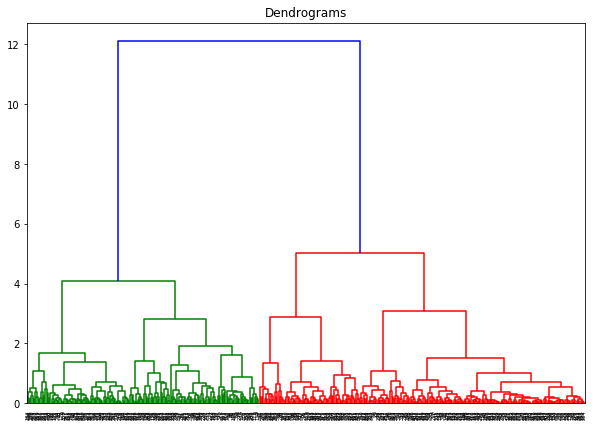

In [28]:
# Create Dendrograms to identify the number of clusters that we can formed using the dataset

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
# X-axis contains the samples and y-axis represents the distance between these samples (priximity matrix values)

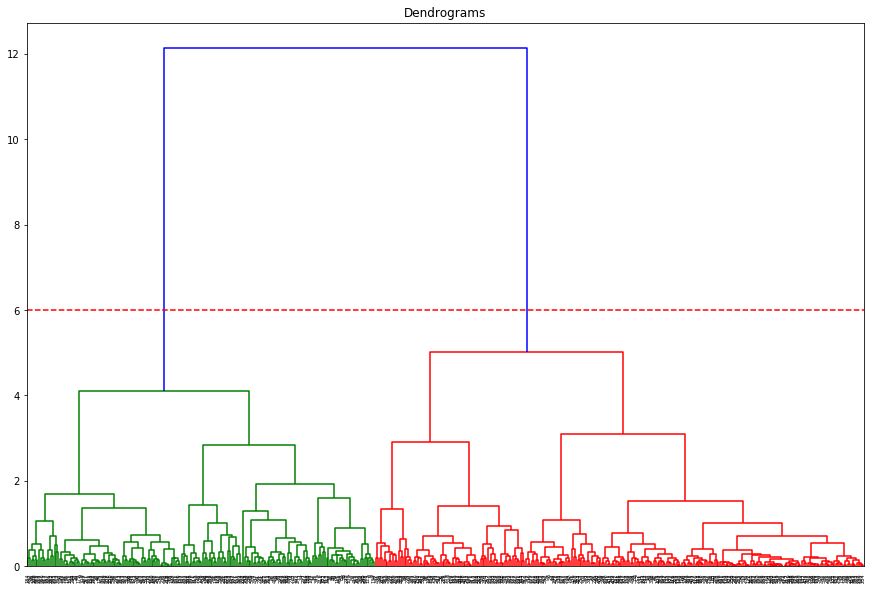

In [33]:
# Vertical line with maximum distance is the blue line and hence we can make 6 as a threshold and cut the dendrogram
plt.figure(figsize=(15,10))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward')) # ward : Minimize the Sum of squared distances within all clusters
plt.axhline(y=6,color='r',linestyle='--')

In [44]:
# Clustering

from sklearn.cluster import AgglomerativeClustering
clustermodel=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
clustermodel.fit_predict(data_scaled)

# output: 0 represents one group and 1 represents another group

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

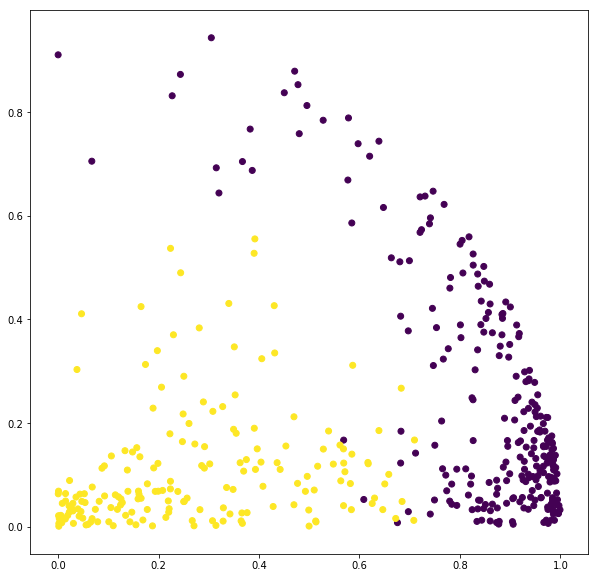

In [45]:
# Now we can visualize the two clusters 
plt.figure(figsize=(10,10))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=clustermodel.labels_)